# Hennepin County Environmental Analysis Example

This data flow is one of 19 I created to model criteria for this project. Using Geopandas, I joined data from a Gini-Simpson Index Value (biodiversity) layer onto my data of parcels in the County. I then calculated the area of "high" biodiversity in each parcel to create a ratio. This was then translated into a final rating to proxy a parcel's biodiversity.

This is an example of a process that was greatly improved by moving off of ArcGIS. I computed that, using Model Builder in ArcGIS, it would take years of computer time to compute the needed data. By moving the process in Python, the process only takes a couple of minutes. And, as the processes are now in Python, the project could be scaled up even further, as my processes can now run on the majority of supercomputers that don't run desktop Windows.

In [1]:
#!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


# 2.3. Habitat Diversity
For an overview of the complete workflow, see [here](https://docs.google.com/drawings/d/1WioyI9xCmCNcnfSQ6i_2U3B-39jCvFT18UzVc81ojL8/edit).

This specific workflow creates one component of three for the habitat quality score (Figure 1).

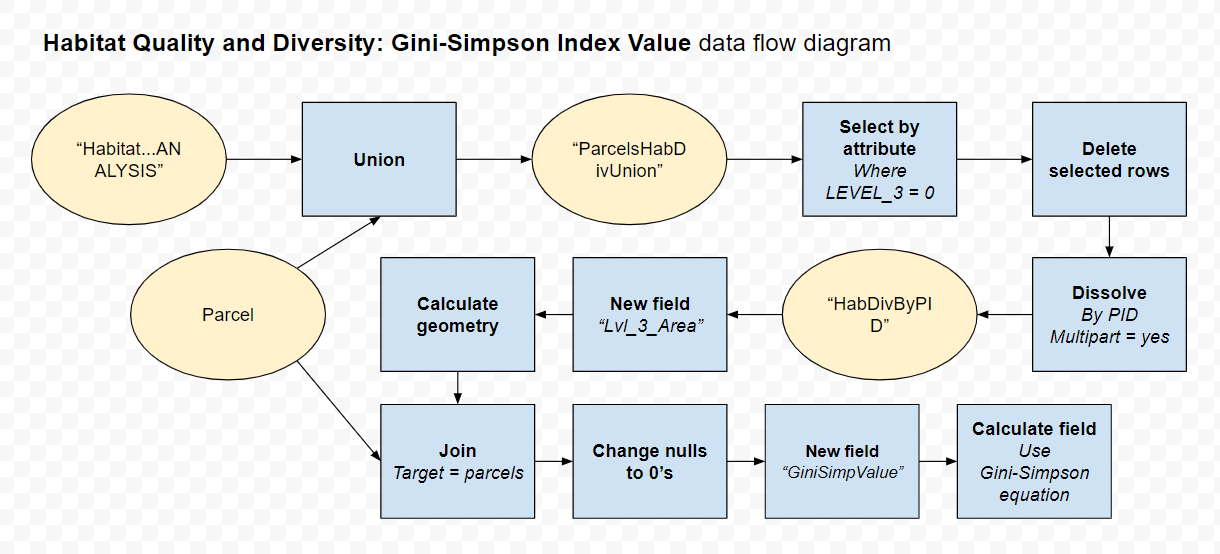

Note that the data flow associated with this notebook is different from the ArcPro flows described in the links of the overview workflow.

In [1]:
import geopandas as gpd

In [2]:
habitat = gpd.read_file("HabitatDiversity_Lvl3.shp")
habitat

,LEVEL_3,Lvl3_Descr,ORIG_FID,Shape_Leng,Shape_Area,geometry
0,31100,Upland coniferous forest,1,443.211481,3344.203570,"POLYGON ((440237.224 4974746.732, 440237.121 4..."
1,31200,Saturated coniferous forest,2,706.287470,10838.184943,"POLYGON ((464270.919 4971680.584, 464294.327 4..."
2,31200,Saturated coniferous forest,2,711.714113,30737.228814,"POLYGON ((459620.605 4972473.219, 459610.546 4..."
3,31200,Saturated coniferous forest,2,948.148727,17058.639338,"POLYGON ((459959.503 4974968.499, 459974.136 4..."
4,31200,Saturated coniferous forest,2,281.529204,3063.320907,"POLYGON ((441545.698 4976476.767, 441541.869 4..."
...,...,...,...,...,...,...
19251,93300,Palustrine open water,51,336.790232,6785.182675,"POLYGON ((459684.625 5008294.500, 459667.000 5..."
19252,93300,Palustrine open water,51,119.183975,624.718100,"POLYGON ((460713.062 5008591.000, 460711.938 5..."
19253,93300,Palustrine open water,51,306.763824,6196.788650,"POLYGON ((459392.125 5008950.500, 459382.906 5..."
19254,91100,Slow moving linear open water habitat,52,1390.795450,8652.923283,"POLYGON ((469231.542 4980752.776, 469231.196 4..."


In [3]:
parcels = gpd.read_file("parcels_2.2.shp")
parcels

,PID,Shape_Leng,Shape_Area,QC_Value,PA_Value,NS_Value,QR_Value,geometry
0,1611722420002,1107.305967,6.400121e+04,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4..."
1,1811823110002,12569.961290,1.492362e+06,1,1,1,4.0,"MULTIPOLYGON (((450703.747 4987122.617, 450703..."
2,2911721220017,2488.819141,3.087418e+05,0,1,1,0.0,"POLYGON ((470047.763 4974177.644, 470056.896 4..."
3,3211821210002,5982.619478,6.015234e+05,0,1,1,0.0,"MULTIPOLYGON (((471130.189 4982197.224, 471130..."
4,3312022130001,2334.010448,2.951369e+05,0,0,1,0.0,"POLYGON ((463494.209 5001179.879, 463627.019 5..."


In [5]:
parcels.crs = "EPSG:26915"

In [6]:
#Spatial joining parcels with the habitat diversity areas#
parcels_Lvl3_int = gpd.overlay(parcels, habitat, how='intersection')
parcels_Lvl3_int.head()

,PID,Shape_Leng_1,Shape_Area_1,QC_Value,PA_Value,NS_Value,QR_Value,LEVEL_3,Lvl3_Descr,ORIG_FID,Shape_Leng_2,Shape_Area_2,geometry
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,42100,Upland deciduous woodland,9,1664.398886,27458.200645,"POLYGON ((463010.367 4976210.848, 462989.986 4..."
1,1611722420002,1107.305967,64001.208025,0,3,2,0.0,52400,Seasonally flooded deciduous shrubland,18,536.193908,12194.299365,"POLYGON ((462766.313 4976250.554, 462767.613 4..."
2,1611722420002,1107.305967,64001.208025,0,3,2,0.0,61500,Seasonally flooded emergent vegetation,24,2464.974862,34038.680476,"MULTIPOLYGON (((462833.926 4976209.392, 462843..."
3,1611722420002,1107.305967,64001.208025,0,3,2,0.0,61600,Semipermanently flooded emergent vegetation,25,1275.312668,67973.130441,"POLYGON ((462771.380 4976373.758, 462845.311 4..."
4,1611722420002,1107.305967,64001.208025,0,3,2,0.0,93300,Palustrine open water,51,176.786371,1019.465619,"POLYGON ((462909.399 4976331.202, 462900.750 4..."


In [7]:
#Calculating the area of each habitat area then adding it to the intersection data#
parcels_Lvl3_int['Lvl3_Area']=parcels_Lvl3_int.area
parcels_Lvl3_int.head()

,PID,Shape_Leng_1,Shape_Area_1,QC_Value,PA_Value,NS_Value,QR_Value,LEVEL_3,Lvl3_Descr,ORIG_FID,Shape_Leng_2,Shape_Area_2,geometry,Lvl3_Area
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,42100,Upland deciduous woodland,9,1664.398886,27458.200645,"POLYGON ((463010.367 4976210.848, 462989.986 4...",15976.968961
1,1611722420002,1107.305967,64001.208025,0,3,2,0.0,52400,Seasonally flooded deciduous shrubland,18,536.193908,12194.299365,"POLYGON ((462766.313 4976250.554, 462767.613 4...",8659.744778
2,1611722420002,1107.305967,64001.208025,0,3,2,0.0,61500,Seasonally flooded emergent vegetation,24,2464.974862,34038.680476,"MULTIPOLYGON (((462833.926 4976209.392, 462843...",11844.190554
3,1611722420002,1107.305967,64001.208025,0,3,2,0.0,61600,Semipermanently flooded emergent vegetation,25,1275.312668,67973.130441,"POLYGON ((462771.380 4976373.758, 462845.311 4...",5271.935905
4,1611722420002,1107.305967,64001.208025,0,3,2,0.0,93300,Palustrine open water,51,176.786371,1019.465619,"POLYGON ((462909.399 4976331.202, 462900.750 4...",1007.984835


In [8]:
#Dropping extra columns#
parcels_Lvl3_int = parcels_Lvl3_int.drop(['LEVEL_3','Shape_Leng_2','Shape_Area_2','Lvl3_Descr','ORIG_FID'], axis=1)
parcels_Lvl3_int.head()

,PID,Shape_Leng_1,Shape_Area_1,QC_Value,PA_Value,NS_Value,QR_Value,geometry,Lvl3_Area
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463010.367 4976210.848, 462989.986 4...",15976.968961
1,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((462766.313 4976250.554, 462767.613 4...",8659.744778
2,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"MULTIPOLYGON (((462833.926 4976209.392, 462843...",11844.190554
3,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((462771.380 4976373.758, 462845.311 4...",5271.935905
4,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((462909.399 4976331.202, 462900.750 4...",1007.984835


In [10]:
#Spatial join to attach shoreland areas back to parcels#
parcels_Lvl3 = gpd.sjoin(parcels, parcels_Lvl3_int, how="left", op='intersects')
parcels_Lvl3.head()

,PID_left,Shape_Leng,Shape_Area,QC_Value_left,PA_Value_left,NS_Value_left,QR_Value_left,geometry,index_right,PID_right,Shape_Leng_1,Shape_Area_1,QC_Value_right,PA_Value_right,NS_Value_right,QR_Value_right,Lvl3_Area
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",3.0,1611722420002,1107.305967,64001.208025,0.0,3.0,2.0,0.0,5271.935905
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",1.0,1611722420002,1107.305967,64001.208025,0.0,3.0,2.0,0.0,8659.744778
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",4.0,1611722420002,1107.305967,64001.208025,0.0,3.0,2.0,0.0,1007.984835
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",2.0,1611722420002,1107.305967,64001.208025,0.0,3.0,2.0,0.0,11844.190554
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",0.0,1611722420002,1107.305967,64001.208025,0.0,3.0,2.0,0.0,15976.968961


In [11]:
#Dropping superfluous columns#
parcels_Lvl3 = parcels_Lvl3.drop(['index_right','PID_right','Shape_Leng_1','Shape_Area_1','QC_Value_right','PA_Value_right','NS_Value_right','QR_Value_right'], axis=1)
parcels_Lvl3.head()

,PID_left,Shape_Leng,Shape_Area,QC_Value_left,PA_Value_left,NS_Value_left,QR_Value_left,geometry,Lvl3_Area
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",5271.935905
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",8659.744778
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",1007.984835
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",11844.190554
0,1611722420002,1107.305967,64001.208025,0,3,2,0.0,"POLYGON ((463155.202 4976245.519, 463153.694 4...",15976.968961


In [12]:
#Merging the duplicate rows from above to get just one entry for each parcel with the sum of the areas#
aggregation_functions = {'Shape_Leng': 'first', 'Shape_Area': 'first', 'geometry':'first','PID_left':'first', 'Lvl3_Area':'sum','QC_Value_left':'first','PA_Value_left':'first','NS_Value_left':'first','QR_Value_left':'first'}
parcels_Lvl3 = parcels_Lvl3.groupby(parcels_Lvl3['PID_left']).aggregate(aggregation_functions)
parcels_Lvl3.head()

,Shape_Leng,Shape_Area,geometry,PID_left,Lvl3_Area,QC_Value_left,PA_Value_left,NS_Value_left,QR_Value_left
PID_left,,,,,,,,,
1611722420002,1107.305967,6.400121e+04,"POLYGON ((463155.202 4976245.519, 463153.694 4...",1611722420002,42760.825032,0,3,2,0.0
1811823110002,12569.961290,1.492362e+06,"MULTIPOLYGON (((450703.747 4987122.617, 450703...",1811823110002,985691.318379,1,1,1,4.0
2911721220017,2488.819141,3.087418e+05,"POLYGON ((470047.763 4974177.644, 470056.896 4...",2911721220017,19164.114992,0,1,1,0.0
3211821210002,5982.619478,6.015234e+05,"MULTIPOLYGON (((471130.189 4982197.224, 471130...",3211821210002,41860.080337,0,1,1,0.0
3312022130001,2334.010448,2.951369e+05,"POLYGON ((463494.209 5001179.879, 463627.019 5...",3312022130001,0.000000,0,0,1,0.0


In [13]:
#Filling in Nan#
parcels_Lvl3['Lvl3_Area'] = parcels_Lvl3['Lvl3_Area'].fillna(0)
parcels_Lvl3.head()

,Shape_Leng,Shape_Area,geometry,PID_left,Lvl3_Area,QC_Value_left,PA_Value_left,NS_Value_left,QR_Value_left
PID_left,,,,,,,,,
1611722420002,1107.305967,6.400121e+04,"POLYGON ((463155.202 4976245.519, 463153.694 4...",1611722420002,42760.825032,0,3,2,0.0
1811823110002,12569.961290,1.492362e+06,"MULTIPOLYGON (((450703.747 4987122.617, 450703...",1811823110002,985691.318379,1,1,1,4.0
2911721220017,2488.819141,3.087418e+05,"POLYGON ((470047.763 4974177.644, 470056.896 4...",2911721220017,19164.114992,0,1,1,0.0
3211821210002,5982.619478,6.015234e+05,"MULTIPOLYGON (((471130.189 4982197.224, 471130...",3211821210002,41860.080337,0,1,1,0.0
3312022130001,2334.010448,2.951369e+05,"POLYGON ((463494.209 5001179.879, 463627.019 5...",3312022130001,0.000000,0,0,1,0.0


In [14]:
#Creating new column with ratio of each level 3 area to the parcel's area#
parcels_Lvl3['Lvl3_Value']=parcels_Lvl3['Lvl3_Area']/parcels_Lvl3['Shape_Area']
parcels_Lvl3=parcels_Lvl3.drop(['Lvl3_Area','PID_left'],axis=1)
parcels_Lvl3.head()

,Shape_Leng,Shape_Area,geometry,QC_Value_left,PA_Value_left,NS_Value_left,QR_Value_left,Lvl3_Value
PID_left,,,,,,,,
1611722420002,1107.305967,6.400121e+04,"POLYGON ((463155.202 4976245.519, 463153.694 4...",0,3,2,0.0,0.668125
1811823110002,12569.961290,1.492362e+06,"MULTIPOLYGON (((450703.747 4987122.617, 450703...",1,1,1,4.0,0.660491
2911721220017,2488.819141,3.087418e+05,"POLYGON ((470047.763 4974177.644, 470056.896 4...",0,1,1,0.0,0.062072
3211821210002,5982.619478,6.015234e+05,"MULTIPOLYGON (((471130.189 4982197.224, 471130...",0,1,1,0.0,0.069590
3312022130001,2334.010448,2.951369e+05,"POLYGON ((463494.209 5001179.879, 463627.019 5...",0,0,1,0.0,0.000000


In [19]:
#Exporting data from this flow into a shapefile to be used by the next workflow#
parcels_Lvl3 = gpd.GeoDataFrame(parcels_Lvl3,  geometry='geometry')
parcels_Lvl3.to_file('parcels_2.3.shp', driver='ESRI Shapefile')